<h1 style="color: #0071b9; text-align: center;">Master SID - Raisonnement dans l'incertain</h1>
<h2 style="color: #0071b9; text-align: center;">TP n°1 - Prise en main de pyAgrum</h2>
<h2 style="color: #0071b9; text-align: center;">Application à un jeu de devinettes</h2>
<br/><br/>

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Préparation de pyAgrum</h1>

pyAgrum est une librairie Python permettant de manipuler des modèles graphiques décisionnels. La première ligne Python ci-dessous permet de la charger. La seconde ligne contient des fonctions d'affichage qui seront bien pratiques pour afficher ces modèles. Quand vous codez des notebooks pyAgrum, vous avez intérêt à les exécuter.

In [35]:
pip install pyAgrum

In [36]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Création d'un réseau bayésien en spécifiant sa structure</h1>

Il existe différentes méthodes pour créer un réseau bayésien. Une méthode assez pratique consiste à utiliser les "<i>fast prototypes</i>" de pyAgrum, qui permettent de spécifier aisément les variables aléatoires du réseau et, plus généralement, sa structure graphique.

Un <i>fast prototype</i> est une chaîne de caractères contenant des instructions séparées par des ";". Elle est interprétée par une expression du type <code>bn = gum.fastBN(chaîne, default_size)</code>, où <code>default_size</code> spécifie la taille par défaut du domaine des variables aléatoires. <code>default_size</code> est un argument optionnel. Si vous l'omettez, sa valeur par défaut sera 2. Par exemple, <code>bn = gum.fastBN(chaîne, 3)</code> créera un réseau dans lequel toutes les variables ont, par défaut, 3 valeurs : {0, 1, 2}.

Les instructions de la chaîne de caractères sont les suivantes :
* mom_variable : crée une variable aléatoire avec ce nom et le nombre de valeurs par défaut. Il existe des variantes :
  * nom_variable[5] : crée la variable en spécifiant que son domaine est {0,1,2,3,4} (cela permet de spécifier un domaine différent de celui par défaut).
  * nom_variable[3,6] : crée une variable dont le domaine est {3, 4, 5, 6}
  * nom_variable{top|middle|bottom} : crée une variable dont le domaine est {top, middle, bottom}.
* var1->var2 ou var2<-var1 : crée les(s) variable(s) var1 et/ou var2 si elles n'existaient pas déjà et ajoute un arc de var1 vers var2.

Le code ci-dessous vous donne un exemple d'utilisation des <i>fast prototypes</i>. <b>Attention :</b> le réseau bayésien ainsi créé contient des tables de probabilité conditionnelle remplies aléatoirement. D'une manière générale, il faudra, après la création du réseau, reremplir ces tables de manière adéquate.

Pour afficher un réseau bayésien dans un notebook, on peut utiliser <code>gnb.showBN(bn, size=X)</code>, où size est un argument optionnel qui permet de modifier la taille de l'affichage. Si vous ne spécifiez pas <code>size</code>, les deux graphes ci-dessous seront de tailles identiques.

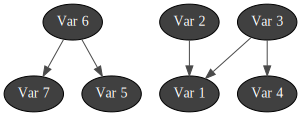

autre manière :


(pyAgrum.BayesNet<double>@0x558af18d8630) BN{nodes: 7, arcs: 5, domainSize: 768, dim: 32, mem: 376o}

In [47]:
bn_graph = "Var 1[3,6]; Var 2{top|middle|botton}->Var 1<-Var 3->Var 4; Var 5[4]; Var 6->Var 7; Var 6->Var 5"
bn_tuto = gum.fastBN(bn_graph)

# affichage du réseau bayésien
gnb.showBN(bn_tuto, size=5)

# autre manière d'afficher le bn:
print("autre manière :")
bn_tuto

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 1</h1>

Dans ce TP, l'application que nous allons faire des réseaux bayésiens est d'aider un joueur à résoudre un petit problème de devinettes dans lequel il doit reconnaître un animal caché en posant des questions sur ses caractéristiques. Par exemple, on peut demander "l'animal peut-il vivre dans l'eau ?". L'objectif est de déterminer avec certitude de quel animal il s'agit en posant le moins de questions possible. Le réseau provient du réseau <i>Animals</i> de <a href="https://repo.bayesfusion.com/bayesbox.html" target="_blank">BayesFusion</a>. Les variables (animaux + caractéristiques) ainsi que leurs domaines sont les suivants :

* animal : singe, pingouin, ornithorynque, rouge-gorge, tortue
* environnement : air, terre, eau
* classe : oiseau, mammifère, reptile
* reproduction : ovipare, vivipare
* sang chaud : vrai, faux
* protection peau : poils, plumes, écailles
* carapace : vrai, faux

La structure du réseau lui-même est la suivante :

<img src="images/animal.png" title="réseau bayésien animal">

Créez le réseau bayésien correspondant en utilisant la fonction <code>fastBN</code> de pyAgrum. Appelez ce réseau <code>bn</code>. Enfin, affichez-le.

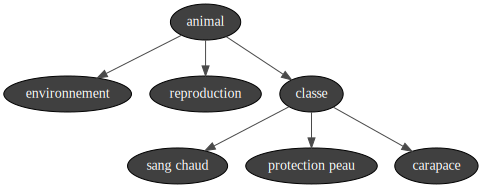

(pyAgrum.BayesNet<double>@0x558af18f1000) BN{nodes: 7, arcs: 6, domainSize: 1080, dim: 41, mem: 528o}

In [127]:
bn_g = "animal{singe|pingouin|ornithorynque|rouge-gorge|tortue}; classe{oiseau|mammifère|reptile} ;environnement{air|terre|eau}; reproduction {ovipare|vivipare} ; sang chaud{vrai|faux} ;  protection peau{poils|plumes|écaille} ; carapace{vrai|faux} ; animal -> classe; animal -> environnement ; animal -> reproduction; classe ->carapace ; classe-> protection peau ; classe -> sang chaud"
bn = gum.fastBN(bn_g)

# affichage du réseau bayésien
gnb.showBN(bn, size=12)

bn

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Domaines des variables et probabilités conditionnelles</h1>

En pyAgrum, les variables aléatoires sont des objets qui contiennent un certain nombre d'informations les concernant (nom, type, domaine, <i>etc.</i>). On peut accéder aux variables du réseau bayésien en exploitant la méthode <code>bn.variable()</code>. Ainsi <code>bn_tuto.variable("Var 1")</code> correspond à l'objet pyAgrum représentant Var 1. Chaque variable aléatoire a un type (Labelized, Range, <i>etc.</i>). Ces types permettent de représenter les variables en mémoire sous différents formats. Pour l'instant, on ne va pas s'occuper d'eux. On peut afficher le contenu des variables aléatoires (leur type et leur domaine) simplement en utilisant la fonction <code>print()</code> de Python. Ainsi <code>print(bn_tuto.variable("Var 1"))</code> affichera que Var 1 est une "<i>range variable</i>" dont le domaine va de 3 à 6. Les variables étant des objets, elles fournissent des méthodes pour les manipuler. Notamment, la méthode <code>variable.domain()</code> des variables permet d'obtenir le domaine de définition de la variable sous la forme d'une chaîne de caractères et <code>variable.domainSize()</code> renvoie la taille de ce domaine (le nombre de valeurs possibles). On peut également récupérer le domaine de définition de la variable sous la forme d'une liste de valeurs via la méthode <code>variable.labels()</code> et obtenir la ième valeur de la variable en utilisant <code>variable.label(i)</code> (les index commencent à 0).

In [80]:
var1 = bn_tuto.variable("Var 1")
print("Var 1 =", var1)
print("Var 2 =", bn_tuto.variable("Var 2"))

domaine1 = var1.domain()
print("type domaine1 =", type(domaine1))
print("taille du domaine =", var1.domainSize())
print("Domaine de Var 1=", domaine1)
print("Domaine de Var 1=", var1.labels())
print("Domaine de Var 2=", bn_tuto.variable("Var 2").domain())

print("1ère valeur de Var 1 =", bn_tuto.variable("Var 1").label(0))
print("1ère valeur de Var 2 =", bn_tuto.variable("Var 2").label(0))

Var 1 = Var 1:Range([3,6])
Var 2 = Var 2:Labelized({top|middle|botton})
type domaine1 = <class 'str'>
taille du domaine = 4
Domaine de Var 1= [3,6]
Domaine de Var 1= ('3', '4', '5', '6')
Domaine de Var 2= {top|middle|botton}
1ère valeur de Var 1 = 3
1ère valeur de Var 2 = top


On peut également accéder aux tables de probabilités conditionnelles (CPT) des variables sachant leurs parents via la méthode <code>cpt</code> des réseaux bayésiens. Ainsi, <code>bn_tuto.cpt("Var 1")</code> renverra la CPT de Var 1. Notez que Var 2 n'ayant pas de parents, sa CPT est une distribution de probabilité marginale. Var 1 ayant deux parents, Var2 et Var3, sa CPT est la distribution conditionnelle $P(\text{Var 1} | \text{Var 2}, \text{Var 3})$. Dans pyAgrum, toutes les tables de probabilité, qu'elles soient marginales, jointes ou conditionnelles, sont de type <code>Potential</code> (pour suivre la dénomination de Shafer-Shenoy). Pour afficher une CPT dans un notebook, utilisez la fonction <code>gnb.showPotential(potential)</code> ou, si c'est la dernière instruction, tapez juste le nom du potentiel.

In [81]:
print("CPT de Var 2 :")
gnb.showPotential(bn_tuto.cpt("Var 2"))

print("CPT de Var 1 :")
bn_tuto.cpt("Var 1")

CPT de Var 2 :


CPT de Var 1 :


(pyAgrum.Potential<double>@0x558af18cc3b0) 
             ||  Var 1                                |
Var 2 |Var 3 ||3        |4        |5        |6        |
------|------||---------|---------|---------|---------|
top   |0     || 0.2506  | 0.1737  | 0.3847  | 0.1910  |
middle|0     || 0.2373  | 0.1961  | 0.3080  | 0.2586  |
botton|0     || 0.3557  | 0.2948  | 0.1366  | 0.2130  |
top   |1     || 0.3382  | 0.0201  | 0.5522  | 0.0895  |
middle|1     || 0.2599  | 0.3377  | 0.3796  | 0.0227  |
botton|1     || 0.2360  | 0.3532  | 0.1369  | 0.2739  |

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 2</h1>

Affichez les variables de votre réseau bn ainsi que leur domaine. Vérifiez que cela correspond bien au problème de devinettes.

Affichez la CPT de la variable "animal" ainsi que celle de la variable "classe" et vérifiez que ces CPT sont cohérentes avec la structure graphique du réseau <code>bn</code>, c'est-à-dire que les parents correspondent bien à ceux du graphe du réseau bayésien. Notez que ces CPT sont remplies avec des valeurs au hasard.

In [114]:
print("1ère valeur de animal =", bn.variable("animal"))
print("1ère valeur de classe =", bn.variable("classe"))
print("1ère valeur de environnement =", bn.variable("environnement"))
print("1ère valeur de reproduction =", bn.variable("reproduction"))
print("1ère valeur de sang chaud =", bn.variable("sang chaud"))
print("1ère valeur de carapace =", bn.variable("carapace"))
print("1ère valeur de protection peau =", bn.variable("protection peau"))

print("CPT de animal :")
gnb.showPotential(bn.cpt("animal"))

print("CPT de classe :")
gnb.showPotential(bn.cpt("classe"))

cptenvironnement = bn.cpt("environnement")


1ère valeur de animal = animal:Labelized({singe|pingouin|ornithorynque|rouge-gorge|tortue})
1ère valeur de classe = classe:Labelized({oiseau|mammifère|reptile})
1ère valeur de environnement = environnement:Labelized({air|terre|eau})
1ère valeur de reproduction = reproduction:Labelized({ovipare|vivipare})
1ère valeur de sang chaud = sang chaud:Labelized({vrai|faux})
1ère valeur de carapace = carapace:Labelized({vrai|faux})
1ère valeur de protection peau = protection peau:Labelized({poils|plumes|écaille})
CPT de animal :


CPT de classe :


<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Affectations de valeurs aux CPT</h1>

Il existe différentes manières d'affecter des valeurs aux potentiels. Une méthode simple consiste à utiliser une expression :

<code>potentiel[:] = liste_de_valeurs</code>.

Pour les distributions marginales (celles des n&oelig;uds sans parents), il suffit de placer dans la liste les valeurs de la CPT. Attention : ces valeurs sont passées telles quelles au potentiel, elles ne sont pas normalisées (cela permet d'exploiter en pyAgrum des modèles dont les potentiels ne somment pas forcément à 1). Si vous souhaitez normaliser la probabilité (ce qui est tout de même souhaitable pour une probabilité), il faut ensuite appeler la méthode <code>normalize()</code> des potentiels.

In [ ]:
cpt2 = bn_tuto.cpt("Var 2")
print("cpt2 avant modification :")
gnb.showPotential(cpt2)

print("cpt2 après modification :")
cpt2[:] = [1,2,3]
gnb.showPotential(cpt2)

print("cpt2 après normalisation :")
cpt2.normalize()
gnb.showPotential(cpt2)

cpt2 avant modification :


cpt2 après modification :


cpt2 après normalisation :


Pour les distributions conditionnelles, il faut faire attention à l'ordre dans lequel les variables sont stockées dans le potentiel. Pour le connaître, utilisez la méthode <code>variablesSequence()</code> des potentiels ou, encore mieux, la propriété <code>names</code> qui donne le nom des variables dans le même ordre.

In [94]:
cpt1 = bn_tuto.cpt("Var 1")
gnb.showPotential(cpt1)
print("noms =", cpt1.names)
cpt1.variablesSequence()

noms = ('Var 1', 'Var 2', 'Var 3')


[(pyAgrum.DiscreteVariable@0x558af18c9ec0) Var 1:Range([3,6]),
 (pyAgrum.DiscreteVariable@0x558af18d0910) Var 2:Labelized({top|middle|botton}),
 (pyAgrum.DiscreteVariable@0x558af18cb010) Var 3:Range([0,1])]

Pour passer des valeurs à <code>cpt1</code>, le plus simple est d'utiliser des listes imbriquées : celles les plus <b>internes</b> ont une taille correspondant au domaine Var 1 (la 1ère variable de l'ordre ci-dessus); elles sont englobées dans des listes dont la taille correspond au domaine de Var 2 (la 2ème variable de l'ordre), qui elles-mêmes sont englobées dans des listes dont la taille correspond au domaine de Var 3 (la 3ème variable de l'ordre). Autrement dit, on englobe les listes dans l'ordre spécifié par <code>variablesSequence()</code> et <code>names</code>. Donc, les listes externes correspondent aux distributions conditionnelles pour lesquelles seule la variable Var 3 a été instanciée. Elles englobent des listes pour lesquelles Var 3 et Var 2 sont instanciées, et ainsi de suite. Dans notre exemple, cela nous donne :

In [95]:
cpt1[:] = [
    # P(Var 1 | Var 2, Var 3 = 0)
    [
        [11,12,13,14], # P(Var 1 | Var 2 = top,    Var 3 = 0)
        [21,22,23,24], # P(Var 1 | Var 2 = middle, Var 3 = 0)
        [31,32,33,34]  # P(Var 1 | Var 2 = bottom, Var 3 = 0)
    ],

    # (Var 1 | Var 2, Var 3 = 1)
    [
        [41,42,43,44], # P(Var 1 | Var 2 = top,    Var 3 = 1)
        [51,52,53,54], # P(Var 1 | Var 2 = middle, Var 3 = 1)
        [61,62,63,64]  # P(Var 1 | Var 2 = bottom, Var 3 = 1)
    ]
]
cpt1

(pyAgrum.Potential<double>@0x558af18cc3b0) 
             ||  Var 1                                |
Var 2 |Var 3 ||3        |4        |5        |6        |
------|------||---------|---------|---------|---------|
top   |0     || 11.0000 | 12.0000 | 13.0000 | 14.0000 |
middle|0     || 21.0000 | 22.0000 | 23.0000 | 24.0000 |
botton|0     || 31.0000 | 32.0000 | 33.0000 | 34.0000 |
top   |1     || 41.0000 | 42.0000 | 43.0000 | 44.0000 |
middle|1     || 51.0000 | 52.0000 | 53.0000 | 54.0000 |
botton|1     || 61.0000 | 62.0000 | 63.0000 | 64.0000 |

Évidemment, une CPT étant une distribution de probabilité conditionnelle, il faut normaliser ses valeurs. La méthode <code>normalize()</code> que l'on avait vu plus haut fait en sorte que la somme de tous les élements du potentiel soit égale à 1. Or, ce n'est pas ce que l'on veut : ici, on souhaite que $\sum_{\text{Var 1}} P(Var 1 | Var 2 = v2, Var 3 = v3) = 1$ pour toutes les valeurs $v2$ et $v3$. Pour cela, on utilise la méthode <code>normalizeAsCPT(index)</code> des potentiels, où index est un argument optionnel (par défaut = 0) qui spécifie l'index de la variable à gauche du signe de conditionnement de la CPT. 0 = la première variable dans <code>variablesSequence()</code>, 1 = la deuxième, <i>etc.</i>. Dans un réseau bayésien de pyAgrum, la première variable correspond toujours à celle à gauche du signe de conditionnement. Donc, ici, on peut ne pas passer d'index à la méthode <code>normalizeAsCPT()</code>.

In [ ]:
cpt1.normalizeAsCPT()

(pyAgrum.Potential<double>@0x55bbbe7d43d0) 
             ||  Var 1                                |
Var 2 |Var 3 ||3        |4        |5        |6        |
------|------||---------|---------|---------|---------|
top   |0     || 0.2200  | 0.2400  | 0.2600  | 0.2800  |
middle|0     || 0.2333  | 0.2444  | 0.2556  | 0.2667  |
botton|0     || 0.2385  | 0.2462  | 0.2538  | 0.2615  |
top   |1     || 0.2412  | 0.2471  | 0.2529  | 0.2588  |
middle|1     || 0.2429  | 0.2476  | 0.2524  | 0.2571  |
botton|1     || 0.2440  | 0.2480  | 0.2520  | 0.2560  |

In [85]:
cpt11 = bn.cpt("sang chaud")
gnb.showPotential(cpt11)
print("noms =", cpt11.names)
cpt11.variablesSequence()

noms = ('sang chaud', 'classe')


[(pyAgrum.DiscreteVariable@0x558af18d3540) sang chaud:Labelized({vrai|faux}),
 (pyAgrum.DiscreteVariable@0x558af18a3170) classe:Labelized({oiseau|mammifère|reptile})]

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 3</h1>

Dans le jeu, on choisit un animal avec une distribution de probabilité uniforme. Remplissez ainsi la CPT de la variable "animal". Affichez la CPT afin de bien vérifier que ce que vous avez saisi est correct.

Les singes et les ornithorynques sont des mammifères. Les pingouins et les rouges-gorges sont des oiseaux. Les tortues sont des reptiles. Remplissez la CPT de la variable "classe". Là encore, avant de passer aux CPT suivantes, vérifiez que celle que vous venez de remplir est correcte.

Les singes vivent uniquement sur terre tandis que les ornithorynques vivent uniquement dans l'eau. Les pingouins et les tortues passent la moitié de leur temps sur terre et l'autre moitié dans l'eau. En revanche, ils ne volent pas. Enfin, les rouges-gorges passent la moitié de leur temps dans le ciel et l'autre moitié sur terre mais ils ne vont jamais dans l'eau. Remplissez la CPT de la variable "environnement".

Les singes sont vivipares. Tous les autres animaux sont ovipares. Remplissez la CPT de la variable "reproduction".

Les oiseaux et les mammifères sont des animaux à sang chaud, contrairement aux reptiles. Remplissez la CPT de la variable "sang chaud".

Les oiseaux ont des plumes, les mammifères des poils et les reptiles des écailles. Remplissez la CPT de la variable "protection peau".

Enfin, seuls les reptiles ont des carapaces. Remplissez la CPT de la variable "carapace".

In [139]:
'''
cptAnimal = bn.cpt("animal")
print("cptAnimal avant modification :")
gnb.showPotential(cptAnimal)

print("cptAnimal après modification :")
cptAnimal[:] = [1,1,1,1,1]
gnb.showPotential(cptAnimal)

print("cptAnimal après normalisation :")
cptAnimal.normalize()
gnb.showPotential(cptAnimal)


cptclasse[:] =[
    # P(classe|animal)
        [0,1,0],
        [1,0,0],
        [0,1,0],
        [1,0,0],
        [0,0,1]
    ]
cptclasse

cptenvironnement[:] = [
    # P(environnement|animal)
        [0,1,0],
        [0,0.5,0.5],
        [0,0,1],
        [0.5,0.5,0],
        [0,0.5,0.5]
]
cptenvironnement

cptreproduction = bn.cpt("reproduction")

cptreproduction[:] = [
    # P(reproduction|animal)
        [0,1],
        [1,0],
        [1,0],
        [1,0],
        [1,0]
]

cptreproduction

cptsang_chaud = bn.cpt("sang chaud")

cptsang_chaud[:] = [
    # P(sang chaud|classe)
        [0,1],
        [0,1],
        [1,0]
]

cptsang_chaud
'''
cptprotection_peau = bn.cpt("protection peau")

cptprotection_peau[:] = [
    # P(protection peau|classe)
        [0,1,0],
        [1,0,0],
        [0,0,1]
]

gnb.showPotential(cptprotection_peau)
'''
cptcarapace = bn.cpt("carapace")

cptcarapace[:] = [
    # P(protection peau|classe)
        [0,1],
        [0,1],
        [1,0]
]

cptcarapace
'''

'\ncptcarapace = bn.cpt("carapace")\n\ncptcarapace[:] = [\n    # P(protection peau|classe)\n        [0,1], \n        [0,1], \n        [1,0]\n]\n\ncptcarapace\n'

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Calculs de probabilité</h1>

A partir d'un réseau bayésien, on peut, comme on l'a vu, accéder aux variables et aux distributions de probabilités conditionnelles (CPT). On peut donc réaliser des calculs probabilistes. Les <code>Potential</code> de pyAgrum sont munis des opérateurs <code>*</code> et <code>/</code> pour réaliser des produits de probabilités ou leur division. Par exemple :

In [140]:
print("calcul de P(Var 6, Var 7) :")
# P(Var 6, Var 7) = P(Var 6) * P(Var 7 | Var 6)
P_jointe = bn_tuto.cpt("Var 6") * bn_tuto.cpt("Var 7")
gnb.showPotential(P_jointe)

calcul de P(Var 6, Var 7) :


On remarque qu'il s'agit bien d'une probabilité jointe : la somme de toutes les valeurs est égale à 1. Les potentiels ont également des méthodes <code>margSumIn</code> et <code>margSumOut</code> pour réaliser des "marginalisations", c'est-à-dire supprimer par sommation des variables :

In [ ]:
# calcul de P(Var 7) = somme_{Var 6} P(Var 6, Var 7) :
# 1/ en indiquant qu'il faut supprimer Var 6
print("calcul de P(Var 7) :")
P_var7 = P_jointe.margSumOut("Var 6")
gnb.showPotential(P_var7)

# 2/ en indiquant qu'il faut conserver Var 7
P_var7 = P_jointe.margSumIn("Var 7")
gnb.showPotential(P_var7)

calcul de P(Var 7) :


D'après la définition des probabilités conditionnelles, $P(\text{Var 6} | \text{Var 7}) = P(\text{Var 6}, \text{Var 7}) / P(\text{Var 7})$. Autrement dit, en Python :

In [ ]:
# P(Var 6 | Var 7) = P(Var 6, Var 7) / P(Var 7)
print("calcul de P(Var 6 | Var 7) :")
P_var6_sachant_var7 = P_jointe / P_var7
gnb.showPotential(P_var6_sachant_var7)

calcul de P(Var 6 | Var 7) :


On peut remarquer que la dernière table a toutes ses valeurs en blanc. Cela indique que les valeurs ne somment pas à 1 sur la variable à gauche du signe de conditionnement (c'est-à-dire sur chaque ligne). Cela provient de l'ordre des variables dans le potentiel. On avait vu que, dans les CPT des réseaux bayésiens, la variable à gauche du signe de conditionnement est la première variable. Ici, la première variable est "Var 7" et non "Var 6". Quand on exécute des calculs "manuellement", il faut donc faire attention à cet ordre. Au besoin, on peut réordonner les variables via la méthode <code>reorganize()</code>:

In [ ]:
print("ancien ordre :", P_var6_sachant_var7.names)
nouveau_P_var6_sachant_var7 = P_var6_sachant_var7.reorganize(["Var 6", "Var 7"])
print("nouvel ordre :", nouveau_P_var6_sachant_var7.names)

print("nouvelle table de probabilité :")
gnb.showPotential(nouveau_P_var6_sachant_var7)

ancien ordre : ('Var 7', 'Var 6')
nouvel ordre : ('Var 6', 'Var 7')
nouvelle table de probabilité :


Pour notre jeu de devinettes, l'intérêt des calculs ci-dessus est que l'on peut inférer s'il n'existe qu'un type d'animal sachant certaines de ses caractéristiques. Par exemple, si l'on calcule la distribution $P(\text{animal} | \text{classe})$, on pourra inférer que si l'on sait que la classe est égale à reptile, l'animal ne peut être qu'une tortue. On pourrait faire de même pour inférer les animaux possibles sachant que ce sont des mammifères et qu'ils vivent plutôt dans l'eau mais les calculs peuvent être fastidieux à réaliser manuellement. Fort heureusement, on peut utiliser des algorithmes d'inférence qui automatisent de manière efficace ces calculs. pyAgrum propose plusieurs algorithmes exacts (LazyPropagation, VariableElimination, ShaferShenoy) ainsi que des algorithmes approchés quand le réseau bayésien est "trop gros" pour des calculs exacts (LoopyBeliefPropagation, GibbsSampling, MonteCarloSampling, WeightedSampling, ImportanceSampling, LoopyGibbsSampling, <i>etc.</i>). Ils fonctionnent tous sur le même principe : on commence par créer une instance de l'algorithme et on appelle la méthode <code>posterior(nom_variable)</code> pour obtenir la probabilité marginale <i>a posteriori</i> de la variable :

In [ ]:
inf = gum.LazyPropagation(bn_tuto)
inf.posterior("Var 7")

(pyAgrum.Potential<double>@0x55bbbefec3d0) 
  Var 7            |
0        |1        |
---------|---------|
 0.1607  | 0.8393  |

On retrouve bien la distribution de la variable classe que l'on avait calculée manuellement plus haut. Si l'on a des observations de valeurs de variables (ce que l'on appelle en anglais des <i>evidence</i>), on peut en informer l'algorithme d'inférence via la méthode <code>addEvidence(nom_variable, observation)</code>. En gros, il existe deux types d'observations : les <i>hard evidence</i>, qui correspondent à des observations précises de la variable (par exemple, classe = reptile), et ce que l'on appelle des <i>soft evidence</i> dans pyAgrum, qui sont des informations qui ne caractérisent pas précisément la valeur de la variable (par exemple, classe $\neq$ reptile, ce qui implique que classe est mammifère ou oiseau).

Pour les <i>hard evidence</i>, <code>observation</code> est égale à la valeur observée dans le domaine de la variable (pour la variable classe, les chaîne de caractères "oiseau", "mammifère" ou "reptile"). On peut également spécifier, non pas la valeur, mais l'index de cette valeur dans le domaine de la variable (c'est plus pratique pour certains algorithmes).

Pour une <i>soft evidence</i> $e_X$ sur une variable $X$, <code>observation</code> correspond à $P(e_X|X)$. C'est donc une table de la même taille que $X$ mais ce n'est pas une distribution de probabilité car la seule variable aléatoire, $X$, est à droite du signe de conditionnement. Ici, il faut interpréter $P(e_X|X=x)$ comme la confiance que l'on accorde au fait d'observer l'information $e_X$ sachant que l'on sait que $X$ a pris la valeur $x$. Par exemple, si $X$ représente une température et que $e_X$ est l'observation "le thermomètre indique 20°C", il n'est pas impossible que la "vraie" température $x$ soit 20,5°C ou 19,5°C. On pourrait donc avoir une confiance de 1 pour X=20°C, une confiance de 0,8 quand X=19,5°C ou X=20,5°C, une confiance de 0,5 quand X=19°C ou X=21°C et une confiance de 0 en dehors de ces valeurs (on pense qu'il est impossible d'observer 20°C sur le thermomètre si la vraie température est 18°C par exemple).

Pour saisir une <i>soft evidence</i>, on saisit une liste avec les confiances. Par exemple, si l'on sait que la classe d'un animal n'est pas un reptile, <code>observation</code> peut être égal à <code>[1, 1, 0]</code> : on pense que si l'animal est un oiseau ou un mammifère, on a une confiance de 1 dans le fait d'obtenir l'<i>evidence</i> "l'animal n'est pas un reptile".

Enfin, si vous souhaitez supprimer toutes les <i>evidence</i> que vous avez insérées précédemment dans l'algorithme d'inférence, vous pouvez utiliser la méthode <code>eraseAllEvidence()</code>.

Par exemple :

In [ ]:
# on observe que la Var 1 est égal à 5 et on calcule P(Var 2 | Var 1 = 5)
inf.eraseAllEvidence()
inf.addEvidence("Var 1", "5") # 5 doit être une chaîne de caractères!
print("P(Var 2 | Var 1 = 5) :")
gnb.showPotential(inf.posterior("Var 2"))

# autre possibilité de saisir la hard evidence Var 1 = 5 :
inf.eraseAllEvidence()
inf.addEvidence("Var 1", 2) # ici, 2 = l'index de la valeur 5
gnb.showPotential(inf.posterior("Var 2"))

# on saisit maintenant la soft evidence Var 1 != 5 :
inf.eraseAllEvidence()
inf.addEvidence("Var 1", [1, 1, 0, 1]) # dom(Var1) = {3, 4, 5, 6}
print("P(Var 2 | Var 1 != 5) :")
gnb.showPotential(inf.posterior("Var 2"))

P(Var 2 | Var 1 = 5) :


P(Var 2 | Var 1 != 5) :


Bien évidemment, on peut avoir plusieurs observations :

In [ ]:
inf.eraseAllEvidence()
inf.addEvidence("Var 1", [1, 1, 0, 1])
inf.addEvidence("Var 3", "1")
gnb.showPotential(inf.posterior("Var 2"))

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 4</h1>

La fonction <code>evidence_animaux</code> prend en argument un ensemble d'animaux (un <code>set</code> de Python) et renvoie une liste contenant des 0 et des 1 représentant l'<i>evidence</i> que seuls les animaux de l'ensemble sont possibles. Par exemple, <code>evidence_animaux({'singe', 'ornithorynque', 'rouge-gorge'})</code> renverra la liste <code>[1, 0, 1, 1, 0]</code> avec un 0 pour les pingouins et les tortues, qui ne sont pas dans l'ensemble. Evidemment, les nombres de la liste sont ordonnés de la même manière que les valeurs (les labels) de la variable <code>animal</code> du réseau bayésien.

Ecrivez le code de la fonction <code>evidence_animaux</code>. Testez le avec l'ensemble <code>{'singe', 'ornithorynque', 'rouge-gorge'}</code>.

In [ ]:
def evidence_animaux(ensemble_animaux):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 5</h1>

La fonction <code>prediction</code> prend en paramètres un réseau bayésien <code>bn</code>, une liste <code>ev_animaux</code> générée par la fonction de la question 4 et une liste <code>liste_evidence</code> de triplets <code>(variable,valeur,modificateur)</code>. Dans chaque triplet, <code>valeur</code> est <b>l'index</b> d'une valeur de la variable et <code>modificateur</code> est un booléen. Si ce booléen est <code>True</code>, cela signifie qu'on observe <code>variable</code> = <code>valeur</code>. En revanche, si le booléen est <code>False</code>, on observe <code>variable</code> $\neq$ <code>valeur</code>. Par exemple, <code>(classe, 2, False)</code> représente l'<i>evidence</i> "classe $\neq$ reptile).

La fonction crée un algorithme d'inférence LazyPropagation et renvoie la distribution <i>a posteriori</i> de la variable animal sachant l'ensemble des <i>evidence</i> de la liste <code>liste_evidence</code> et l'<i>evidence</i> <code>ev_animaux</code> sur la variable <code>animal</code>.

Ecrivez le code de la fonction <code>prediction</code>. Testez le avec L'<i>evidence</i> sur les animaux <code>ev_animaux = evidence_animaux({'singe', 'pingouin', 'ornithorynque'})</code> et les listes d'informations <code>liste_evidence</code> suivantes :

* [classe != reptile, protection peaux = poils]. La distribution <i>a posteriori</i> des animaux obtenue doit être égale à celle juste au dessus de la question 4.
* [classe = oiseau, environnement = eau]. La distribution <i>a posteriori</i> des animaux vaut 0 partout excepté pour les pingouins où elle vaut 1.

In [ ]:
def prediction(bn, ev_animaux, liste_evidence):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Manipulation des valeurs des Potentiels</h1>

Les <code>Potential</code> de pyAgrum sont munis d'un opérateur <code>[]</code> qui permet d'accéder aux valeurs qu'ils contiennent en spécifiant l'index de ces valeurs. Ainsi <code>potentiel[0]</code> est la première valeur, <code>potentiel[1]</code> est la seconde, et ainsi de suite.

In [ ]:
# affichage des valeurs de la 1ère table ci-dessus
proba = inf.posterior("Var 2")
affichage = '{'
for i in range(bn_tuto.variable('Var 2').domainSize()):
    affichage += str(proba[i]) + ', '
affichage = affichage[:-2] + '}' # on supprime le dernier ", " et on ajoute "}"
print(affichage)

{0.16652014725201172, 0.33329004350627617, 0.5001898092417121}


<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 6</h1>

Comme dans la question 5, la fonction <code>animaux_possibles</code> prend en paramètres un réseau bayésien <code>bn</code>, une liste <code>ev_animaux</code> générée par la fonction de la question 4 et une liste <code>liste_evidence</code> de triplets <code>(variable,valeur,modificateur)</code>. La fonction renvoie un ensemble (<code>set</code> de Python) contenant les animaux dont la probabilité <i>a posteriori</i> est différente de 0, autrement dit, ce sont bien les animaux qui sont possibles sachant les observations <code>ev_animaux</code> et <code>liste_evidence</code>.

Ecrivez cette fonction et testez la avec les deux listes de la question 4. Avec la première liste, vous devez obtenir <code>False</code> et, avec la deuxième, <code>pingouin</code>.

Il se peut que certaines observations soient conjointement impossibles. Par exemple, il n'y a aucun animal vivant dans le ciel et possédant une carapace. Si vous testez votre fonction dans un tel cas, elle levera une exception car c'est ce que fera <i>de facto</i> LazyPropagation. Dans ce cas, récupérez l'exception et renvoyez un <code>set</code> vide.

In [ ]:
def animaux_possibles(bn, ev_animaux, liste_evidence):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Les graphes</h1>

pyAgrum dispose de plusieurs types de graphes, notamment :

* <code>DiGraph</code> : graphe orienté (avec des arcs).
* <code>DAG</code> : graphe orienté sans circuit (sans boucle $X_1 \rightarrow X_2 \rightarrow \cdots \rightarrow X_n \rightarrow X_1$). DAG est l'acronyme de <i>Directed Acyclic Graph</i>.
* <code>UndiGraph</code> : graphe non orienté (avec des arêtes plutôt que des arcs).
* <code>MixedGraph</code> : graphe pouvant contenir à la fois des arcs et des arêtes.

Les graphes contiennent des n&oelig;uds qui sont représentés dans pyAgrum par des nombres entiers (leur valeur n'a pas de signification particulière, c'est juste un identifiant). Pour ajouter un n&oelig;ud à un graphe, il suffit d'utiliser une expression <code>noeud = graphe.addNode()</code> ; la méthode <code>addNode</code> retournera alors l'identifiant du n&oelig;ud ajouté. Si l'on souhaite obliger pyAgrum à utiliser un identifiant précis, on peut le passer en paramètre de la méthode <code>addNodeWithId</code>. Pour obtenir l'ensemble des n&oelig;uds contenus dans le graphe, on utilise la méthode <code>nodes()</code>. Par exemple :

In [ ]:
# création d'un graphe vide (pas de noeuds, pas d'arcs)
graphe = gum.DiGraph()

# ajout d'un noeud : pyAgrum choisit l'identifiant
noeud0 = graphe.addNode()
print("valeur de noeud0 :", noeud0)

# ajout d'un noeud en spécifiant son identifiant
graphe.addNodeWithId(5)

print("ensemble des noeuds du graphe :", graphe.nodes())

# affichage du graphe
graphe

valeur de noeud0 : 0
ensemble des noeuds du graphe : {0, 5}


(pyAgrum.DiGraph@0x55bbbfa40270) {0,5} , {}

Pour ajouter des arcs à un <code>DiGraph</code>, on utilise la méthode <code>addArc</code> qui prend en argument les deux n&oelig;uds aux extrémités de l'arc. Pour obtenir l'ensemble des arcs du graphe, on utilise la méthode <code>arcs()</code>. On notera que, dans les couples de n&oelig;uds obtenus, le premier est sur la queue de l'arc et le deuxième sur la pointe.

In [ ]:
graphe = gum.DiGraph()
for noeud in range(10):
    graphe.addNodeWithId(noeud)

for noeud in range(6):
    graphe.addArc(noeud, noeud+2)
    graphe.addArc(noeud, noeud+4)

print("arcs du graphe :", graphe.arcs())

graphe

arcs du graphe : {(2, 4), (0, 4), (1, 5), (3, 7), (4, 6), (5, 7), (0, 2), (2, 6), (4, 8), (5, 9), (1, 3), (3, 5)}


(pyAgrum.DiGraph@0x55bbbfa3fb40) {0,1,2,3,4,5,6,7,8,9} , {1->3,1->5,3->5,3->7,5->7,5->9,0->2,0->4,2->4,2->6,4->6,4->8}

On peut accéder à l'ensemble des parents d'un n&oelig;ud en utilisant une expression <code>graphe.parents(noeud)</code> et à ses enfants via <code>graphe.children(noeud)</code>.

In [ ]:
print("parents du noeud 4 :", graphe.parents(4))
print("enfants du noeud 4 :", graphe.children(4))

parents du noeud 4 : {0, 2}
enfants du noeud 4 : {8, 6}


On peut supprimer un arc via l'expression <code>graphe.eraseArc(noeud_queue, noeud_pointe)</code>. On peut également supprimer des n&oelig;uds vi l'expression <code>graphe.eraseNode(noeud)</code>. Lorsque l'on supprime un n&oelig;ud, pyAgrum supprime éaglement tous les arcs dont c'est une extrémité. Par exemple, sur le graphe ci-dessus, si on supprime le n&oelig;ud 4, cela supprimera également les arcs $0 \rightarrow 4$, $2 \rightarrow 4$, $4 \rightarrow 6$ et $4 \rightarrow 8$.

In [ ]:
# suppression de l'arc 1->3
graphe.eraseArc(1,3)

# suppression du noeud 4 et de ses arcs adjacents
graphe.eraseNode(4)

graphe

(pyAgrum.DiGraph@0x55bbbfa3fb40) {0,1,2,3,5,6,7,8,9} , {1->5,3->5,3->7,5->7,5->9,0->2,2->6}

Lorsque l'on souhaite rajouter de la sémantique aux n&oelig;uds, il suffit de créer un dictionnaire dont les clefs sont les identifiants des n&oelig;uds.

In [ ]:
graphe = gum.DiGraph()
informations = {}

for noeud in range(10):
    graphe.addNodeWithId(noeud)
    informations[noeud] = {'noeud': noeud, 'info': None}

for noeud in range(7):
    graphe.addArc(noeud, noeud+2)
    graphe.addArc(noeud, noeud+3)

print("informations :", informations)
graphe

informations : {0: {'noeud': 0, 'info': None}, 1: {'noeud': 1, 'info': None}, 2: {'noeud': 2, 'info': None}, 3: {'noeud': 3, 'info': None}, 4: {'noeud': 4, 'info': None}, 5: {'noeud': 5, 'info': None}, 6: {'noeud': 6, 'info': None}, 7: {'noeud': 7, 'info': None}, 8: {'noeud': 8, 'info': None}, 9: {'noeud': 9, 'info': None}}


(pyAgrum.DiGraph@0x55bbbf96f120) {0,1,2,3,4,5,6,7,8,9} , {5->7,2->5,1->3,6->9,5->8,4->6,1->4,0->2,4->7,3->5,0->3,3->6,2->4,6->8}

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 7</h1>

Ecrivez une fonction <code>erase_node_and_descendants</code> qui prend en paramètres un DiGraph <code>graphe</code>, un dictionnaire <code>infos</code> contenant la sémantique des n&oelig;uds, et l'identifiant <code>noeud</code> d'un n&oelig;ud. La fonction supprime alors de ce graphe le n&oelig;ud ainsi que tous ses descendants, c'est-à-dire ses enfants, les enfants de ses enfants, <i>etc.</i> Evidemment, elle supprime également du dictionnaire les entrées correspondant à ces n&oelig;uds. Indice 1 : faire une fonction récursive qui commence par supprimer les enfants puis qui supprime le n&oelig;ud. Indice 2 : on a vu que <code>graphe.children(node)</code> contient l'ensemble des enfants de <code>node</code>. Comme vous allez supprimer des n&oelig;uds de cet ensemble, au lieu d'itérer directement dessus pour faire ces suppressions, il est préférable de transformer l'ensemble en liste puis d'itérer sur cette liste car cette liste sera une constante alors que l'ensemble est modifié à chaque suppression.

Testez la sur le graphe ci-dessus. L'exécution de la fonction sur le n&oelig;ud 3 devrait supprimer tous les n&oelig;uds sauf les n&oelig;uds 0, 1, 2 et 4.

In [ ]:
def erase_node_and_descendants(graphe, infos, node):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Le jeu "Qui est cet animal"</h1>

Au début d'une partie de jeu, le maître du jeu choisit un animal parmi les singes, les pingouins, les ornithorynques, les rouges-gorges et les tortues. Le joueur doit trouver de quel animal il s'agit en posant des questions du type "l'animal a t-il cette caractéristique ?". Les caractéristiques sont définies dans les variables du réseau bayésien : environnement, reproduction, sang chaud, protection peau, carapace. Par exemple, le joueur peut demander "l'animal peut-il vivre dans l'eau ?". Dans notre réseau bayésien, on traduira cela par le calcul de la distribution $P(\text{animal} | \text{environnement} = \text{eau})$. Si le maître du jeu répond "oui", tous les animaux dont la probabilité est différente de 0 sont possibles, les autres ne peuvent être l'animal caché. Evidemment, c'est l'inverse si le maître du jeu répond "non". Dans le jeu, on n'a pas le droit de poser deux fois une question sur la même caractéristique. L'objectif est de trouver l'animal en posant le moins de questions possible.

Afin de proposer une solution optimale, on va créer un arbre de recherche, comme le montre la figure ci-dessous. Au début de la partie, on a un ensemble S1 d'animaux (tous les animaux). C'est la situation dans laquelle on se trouve dans le n&oeulig;ud "top node". les enfants de "top node" sont toutes les questions que l'on peut poser. Si on pose une question Q1, cela se traduit dans notre formalisme par un conditionnement probabiliste du type variable = valeur. Dans cet arbre, les questions sont symbolisées par des rectangles. Le maître du jeu peut répondre oui ou non à cette question, ce qui est symbolisé par des ellipses. Si c'est oui, alors cela réduit la liste des animaux à l'ensemble S2, sinon cela la réduit à l'ensemble S3, qui est le complémentaire de S2 dans S1. Supposons que la réponse R1 était oui. Dans ce cas, on sait que les animaux possibles appartiennent à S2. On peut alors poser de nouvelles questions. Ici, seules les questions Q2 et Q3 sont possibles. Si l'on pose la question Q2 et que la réponse est oui, on réduit la liste des animaux possibles à S4, sinon on la réduit à S5 = S2 - S4. Et ainsi de suite. Ici, on a donc S8 est l'ensemble des animaux possibles sachant que la réponse à la question Q1 est non et que celle à la question Q4 est oui.

<img src="images/arbre.png" width="80%" title="arbre de recherche">

Il y a tout de même plusieurs règles à respecter dans cet arbre :

1. une rectangle (question) a exactement deux enfants (ellipses), qui correspondent aux 2 réponses oui/non possibles.
2. une question (un rectangle) n'est valide que si les deux ensembles obtenus selon les réponses oui/non sont tous les deux <b>non vides</b>. En effet si un ensemble est vide, l'autre est égal précisément à l'ensemble que l'on avait avant de poser la question. Donc, cette question ne fait pas avancer le schmilblick et on ne doit pas l'ajouter à l'arbre.
3. Chaque ellipse a au moins un enfant, sauf si l'ensemble qu'elle contient (la réponse à la question) ne contient qu'un seul animal.

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 8</h1>

Comme on l'a vu plus haut, les n&oelig;uds du graphe ci-dessus ont une sémantique, encodée à l'aide d'un dictionnaire : à chaque n&oelig;ud est associé un dictionnaire qui contient les informations sur le n&oelig;ud. Celles-ci sont les suivantes :

* pour le top node : <br/>
  <code>{'type': 'top_node'}</code>
* pour les questions : <br/>
  <code>{
    'type': 'question',
    'var_value': (nom_variable, index_valeur)
  }</code>
* pour les réponses : <br/>
  <code>{
    'type': 'reponse',
    'reponse': True ou False,
    'animaux': ensemble d'animaux
  }</code>

Ecrivez une fonction <code>add_question</code> qui prend en paramètres :

1. un DiGraph <code>graphe</code>,
2. un dictionnaire <code>infos</code> contenant la sémantique des n&oelig;uds du graphe,
3. l'identifiant <code>parent_node</code> du n&oelig;ud dont la nouvelle question sera l'enfant dans le graphe,
4. le nom <code>nom_variable</code> de la variable sur laquelle on pose la question,
5. l'index <code>index_valeur</code> de la valeur que l'on affecte à la variable dans la question posée.

La fonction crée le n&oelig;ud correspondant à la question à la fois dans le graphe et dans le dictionnaire <code>infos</code>, ainsi que l'arc du parent vers la question. Enfin, elle renvoie l'identifiant du n&oelig;ud question qu'elle vient de créer.

Ecrivez une fonction <code>add_reponse</code> qui prend en paramètres :

1. un DiGraph <code>graphe</code>,
2. un dictionnaire <code>infos</code> contenant la sémantique des n&oelig;uds du graphe,
3. l'identifiant <code>parent_node</code> du n&oelig;ud dont la réponse sera l'enfant dans le graphe,
4. un booléen <code>reponse</code> indiquant la réponse du maître du jeu (True = oui, False = non),
5. un ensemble (set) <code>animaux_restants</code> contenant les noms des animaux encore possibles après la réponse du maître du jeu.

La fonction crée le n&oelig;ud correspondant à la réponse à la fois dans le graphe et dans le dictionnaire <code>infos</code>, ainsi que l'arc du parent vers la réponse. Enfin, elle renvoie l'identifiant du n&oelig;ud réponse qu'elle vient de créer.

In [ ]:
def add_question(graphe, infos, parent_node, nom_variable, index_valeur):
    pass

def add_reponse(graphe, infos, parent_node, reponse, animaux_restants):
    pass


# tests des deux fonctions :
graphe = gum.DiGraph()
top_node = graphe.addNode()
infos  = {top_node: {'type': 'top_node'}}

Q1_node = add_question(graphe, infos, top_node, 'X1', 1)
Q2_node = add_question(graphe, infos, top_node, 'X1', 1)

R1_oui = add_reponse(graphe, infos, Q1_node, True, {'a', 'b'})
R1_non = add_reponse(graphe, infos, Q1_node, False, {'c'})

print(infos)
graphe

{0: {'type': 'top_node'}}


(pyAgrum.DiGraph@0x55bbbfd27d60) {0} , {}

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Création de l'arbre de recherche</h1>

La fonction récursive <code>cree_arbre_recherche</code> crée l'arbre de recherche proprement dit (le graphe + le dictionnaire de sémantique des n&oelig;uds).

<b>Décommentez l'avant dernière ligne du code afin de l'appliquer sur votre réseau bayésien</b>.

In [ ]:
def cree_arbre_recherche(bn, graphe, infos, names, current_name_index, current_node, ensemble_animaux, liste_evidence):
    has_questions = False

    # on sélectionne la prochaine variable sur laquelle va porter la question. Afin d'éviter
    # que les deux couples de questions (Var1=var1 puis Var2=var2) et (Var2=var2 puis Var1=var1)
    # apparaissent tous les deux dans l'arbre, on limite les variables possibles à celles dont
    # l'index dans names est >= current_name_index. Les questions suivantes auront un index
    # strictement supérieur.
    for name_index in range(current_name_index, len(names)):
        name = names[name_index]
        var = bn.variable(name)

        # on pose des questions sur toutes les valeurs possibles de la variable sélectionnée
        for value in range(var.domainSize()):
            # on crée une nouvelle question et, pour l'instant, elle n'a pas d'enfant
            question_node = add_question(graphe, infos, current_node, name, value)
            nb_children = 0

            # on vérifie si l'ajout de la question var = value permet de partitionner
            # ensemble_animaux en 2 ensembles non vides (règle 2 de l'arbre de recherche)
            liste_evidence.append((name, value, True))

            ev_animaux = evidence_animaux(ensemble_animaux)
            # les ensembles d'animaux des réponses (noeud de gauche = True, noeud de droite = False)
            ensemble_animaux_left = animaux_possibles(bn, ev_animaux, liste_evidence)
            ensemble_animaux_right = ensemble_animaux - ensemble_animaux_left

            liste_evidence.pop()


            # check que les 2 ensembles sont bien non vides
            if len(ensemble_animaux_left) != 0 and \
               len(ensemble_animaux_right) != 0:

                # on crée le noeud de réponse de gauche
                reponse_node = add_reponse(graphe, infos, question_node, True, ensemble_animaux_left)

                if len(ensemble_animaux_left) == 1:
                    # ici, il ne reste qu'un animal possible, donc on n'essaye pas de développer
                    # plus l'arbre de recherche
                    nb_children += 1
                else:
                    # ici, il reste plusieurs animaux possibles. On recherche s'il y a d'autres
                    # questions à poser pour arriver à un seul animal. La fonction
                    # cree_arbre_recherche renvoie un booléen indiquant si, effectivement, ces
                    # questions existent.
                    liste_evidence.append((name, value, True))
                    if cree_arbre_recherche(bn, graphe, infos, names, name_index+1, reponse_node,
                                            ensemble_animaux_left, liste_evidence):
                        nb_children += 1
                    liste_evidence.pop()

                # on crée le noeud de réponse de droite
                reponse_node = add_reponse(graphe, infos, question_node, False, ensemble_animaux_right)

                if len(ensemble_animaux_right) == 1:
                    nb_children += 1
                else:
                    liste_evidence.append((name, value, False))
                    # on recherche s'il y a d'autres questions à poser
                    if cree_arbre_recherche(bn, graphe, infos, names, name_index+1, reponse_node,
                                            ensemble_animaux_right, liste_evidence):
                        nb_children += 1
                    liste_evidence.pop()

            # si le noeud question n'a pas 2 enfants, c'est qu'on ne peut pas
            # l'utiliser pour trouver la solution (règle 2 de l'arbre de recherche)
            if nb_children != 2:
                erase_node_and_descendants(graphe, infos, question_node)
            else:
                has_questions = True

    # indique si l'on a trouvé au moins une question qui vérifie les règles de l'arbre
    # de recherche
    return has_questions


# cette fonction initialise les structures nécessaires à la fonction récursive ci-dessus et
# elle l'appelle pour constituer l'arbre de recherche, qu'elle renvoie sous la forme d'un
# couple (graphe, dictionnaire)
def arbre_recherche(bn):
    # création d'un graphe vide
    graphe = gum.DiGraph()

    # création du top node
    top_node = graphe.addNode()
    infos  = {top_node: {'type': 'top_node'}}

    # les noms des variables sur lesquelles portent les questions
    names = list(bn.names())
    names.remove('animal')

    # l'ensemble de tous les animaux
    ensemble_animaux = set(bn.variable('animal').labels())

    cree_arbre_recherche(bn, graphe, infos, names, 0, top_node, ensemble_animaux, [])

    return graphe, infos

# décommentez la ligne ci-dessous pour créer l'arbre pour votre bn
# graphe, infos = arbre_recherche(bn)
print(graphe.size())


1


<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 9</h1>

Ecrivez une fonction <code>add_hauteur</code> qui prend en paramètres le DiGaph <code>graphe</code> et le dictionnaire <code>infos</code> calculés dans la question précédente, ainsi que l'identifiant d'un n&oelig;ud <code>node</code> du graphe. La fonction rajoute aux entrées du dictionnaire<code>infos</code> correspondant à <code>node</code> et à ses descendants leur hauteur dans le graphe. Celle-ci est calculée comme suit :

1. Un n&oelig;ud sans enfant a une hauteur de 0;
2. La hauteur d'un n&oelig;ud de type "reponse" ou "top_node" qui a au moins un enfant est égale à 1 + le minimum des hauteurs de ses enfants;
3. La hauteur d'un n&oelig;ud de type "question" est égale au maximum des hauteurs de ses enfants.

La logique des règles ci-dessus est la suivante : la hauteur d'un n&oelig;ud correspond au nombre de questions qu'il reste à poser pour garantir de trouver l'animal caché. Quand on pose une question (élément de <code>infos</code> de type "<code>question</code>"), on ne sait pas encore si le maître de jeu va répondre oui ou non. Imaginons qu'il faille encore poser $X$ questions pour trouver l'animal si la réponse est oui, et $Y$ si c'est non. Pour garantir de trouver l'animal, il faut donc poser, au pire, $\max(X,Y)$ questions, d'où le maximum de la règle 3. Si le n&oelig;ud <code>node</code> correspond à la réponse à une question (élément de <code>infos</code> de type "<code>reponse</code>"), la prochaine question à poser est celle qui va garantir de converger le plus rapidement vers l'animal. Autrement dit, il faut choisir la question dont la hauteur est la plus faible, d'où le minimum dans la règle 2.

Faites en sorte que votre fonction renvoie la hauteur du n&oelig;ud <code>node</code>. Appliquez votre fonction sur le n&oelig;ud "top_node".

In [ ]:
def add_hauteur(graphe, infos, node):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 10</h1>

Une stratégie de résolution du problème de devinettes consiste à poser des questions en envisageant toutes les réponses du maître du jeu. On peut donc la définir avant le début du jeu et l'exploiter lorsque le jeu débute. Par exemple, une stratégie possible serait :
<pre>
Si environnement = eau alors :
   Si carapace = faux alors :
      Si protection peau = poils alors animal = ornithorynque
      Sinon animal = pingouin
   Sinon animal = tortue
Sinon :
   Si classe = oiseau alors animal = rouge-gorge
   Sinon animal = singe
</pre>

Dans notre formalisme, une stratégie est donc un sous-arbre de l'arbre de recherche vérifiant les propriétés suivantes :

1. Le n&oelig;ud de type <code>top_node</code> a un seul enfant (la 1ère question à poser),
2. Un n&oelig;ud de type <code>question</code> a exactement deux enfants (les 2 réponses du maître du jeu),
3. Un n&oelig;ud de type <code>reponse</code> a exactement un enfant si ce n&oelig;ud a des enfants dans l'arbre de recherche, sinon il n'a pas d'enfant.

La propriété 1 indique qu'au début du jeu, on ne choisit qu'une seule question. La propriété 2 indique que, lorsque l'on pose une question, on envisage toutes les réponses que le maître de jeu peut fournir. La propriété 3 indique que, lorsqu'on a obtenu une réponse, on sait précisément quelle sera la question suivante à poser.

Une stratégie optimale est une stratégie, donc un sous-arbre, de hauteur minimale. La propriété 2 ci-dessus indique qu'on n'a pas le choix pour les enfants des n&oelig;uds de type <code>question</code>. Pour les autres, si on veut obtenir une hauteur minimale, il faut choisir l'enfant qui permettra d'obtenir la plus petite hauteur. Or, c'est précisément ce qu'a calculé la fonction <code>add_hauteur</code>. Donc, pour déterminer une stratégie optimale, il suffit de parcourir l'arbre de recherche et, lorsque l'on est sur un n&oelig;ud <code>node</code> de type <code>reponse</code> ou <code>top_node</code> ayant au moins un enfant, de supprimer tous les enfants (et leurs descendants) dont la hauteur est différente de la hauteur de <code>node</code> - 1 et de ne garder qu'un seul enfant ayant cette hauteur. L'arbre de recherche résultant de cet algorithme est alors une stratégie optimale.

Ecrivez une fonction récursive <code>strategie_optimale</code> qui réalise ces opérations.


In [ ]:
def strategie_optimale(graphe, infos, node):
    pass

<hr style="height: 3px; background-color: #0071b9;">
<h1 style="color: #0071b9;">Question 11</h1>

Comme son nom l'indique, la fonction <code>affiche_strategie</code> affiche une stratégie. On souhaiterait un affichage similaire à :

<pre>
Si environnement = eau alors :
   Si carapace = faux alors :
      Si protection peau = poils alors animal = ornithorynque
      Sinon animal = pingouin
   Sinon animal = tortue
Sinon :
   Si classe = oiseau alors animal = rouge-gorge
   Sinon animal = singe
</pre>

Pour cela, il faut parcourir récursivement l'arbre de recherche de la stratégie : lorsque l'on rencontre un n&oelig;ud de type <code>reponse</code>, on procède à l'affichage. Le paramètre <code>decalage</code> indique le nombre d'espaces à écrire au début de chaque ligne pour décaler le texte vers la droite. Ensuite, dans tous les cas, on affiche la stratégie des enfants.

Les n&oelig;uds de type <code>top_node</code> et <code>reponse</code> n'ont qu'un seul enfant au plus et ne posent pas de problème. En revanche, les n&oelig;uds de type <code>question</code> ont deux enfants. La méthode <code>children(node)</code> des <code>DiGraph</code> de pyAgrum renvoie un ensemble d'enfants. Les éléments de ces ensembles sont dans n'importe quel ordre. La question posée au maître du jeu était du type <code>variable = valeur</code>. Pour obtenir l'affichage <code>Si variable = valeur</code> avant le <code>Sinon</code>, il est pratique que le 1er enfant soit celui dont le champ <code>reponse</code> est <code>True</code> et le 2ème soit celui dont le champ <code>reponse</code> est <code>False</code>. Un <code>set</code> Python étant, par essence, non ordonné, il serait judicieux de transformer l'ensemble en liste puis, si le 1er élément de la liste correspond à <code>reponse = False</code>, d'intervertir les 2 éléments dans la liste.

Ecrivez la fonction <code>affiche_strategie_optimale</code> et testez la sur la stratégie optimale que vous aviez déterminée.

In [ ]:
def affiche_strategie_optimale(graphe, infos, node, decalage):
    pass